<div style="
    background: linear-gradient(90deg, #1e3c72, #2a5298);
    padding: 20px;
    border-radius: 14px;
    text-align: center;
    box-shadow: 0px 6px 16px rgba(0,0,0,0.3);
">

<h1 style="
    color: #ffffff;
    font-size: 38px;
    letter-spacing: 1.2px;
    margin: 0;
    font-family: 'Segoe UI', sans-serif;
">
INCOME CLASSIFIER SYSTEM FOR INDIVIDUALS 💵 
</h1>

</div>


<div style="
    background: linear-gradient(135deg, #0b486b, #3b8686);
    padding: 22px;
    border-radius: 14px;
    color: #ffffff;
    font-family: 'Segoe UI', sans-serif;
    box-shadow: 0px 5px 14px rgba(0,0,0,0.25);
">

<h1 style="
    text-align: center;
    font-size: 32px;
    color: #ffe082;
    margin-bottom: 18px;
">
PROBLEM STATEMENT
</h1>

<p style="font-size: 18px; line-height: 1.7;">
Subsidy Inc. delivers subsidies to individuals based on their income 💵 
</p>

<ul style="font-size: 17px; line-height: 1.8;">
    <li>Accurate income data is one of the hardest piece of data to obtain across the world</li>
    <li>Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters.</li>
</ul>

<p style="font-size: 18px; margin-top: 14px;">
<b>Subsidy Inc. wishes us to:</b>
</p>

<p style="
    font-size: 19px;
    color: #a5f3fc;
    font-weight: bold;
">
DEVELOP AN INCOME CLASSIFIER SYSTEM FOR INDIVIDUALS 💵.
</p>

<hr style="border: 1px solid rgba(255,255,255,0.3); margin: 18px 0;">

<p style="font-size: 19px; font-weight: bold; color: #ffe082;">
The Objective is to:
</p>

<ul style="font-size: 17px; line-height: 1.8;">
    <li>Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy.</li>
    <li>Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.</li>
</ul>

</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

<h2 style="
    color: #1e3c72;
    background: #e3f2fd;
    padding: 10px 18px;
    border-left: 6px solid #1e3c72;
    border-radius: 8px;
    font-size: 24px;
    font-family:'Inter', Arial, sans-serif;
">
IMPORTING AND CREATING COPY OF DATA
</h2>


In [6]:
data_income=pd.read_csv('../datasets/income(1).csv')
data_copy=data_income.copy(deep=False)

<h2 style="
    color: #1e3c72;
    background: #e3f2fd;
    padding: 10px 18px;
    border-left: 6px solid #1e3c72;
    border-radius: 8px;
    font-size: 24px;
    font-family:'Inter', Arial, sans-serif;
">
EXPLANATORY DATA ANALYSIS(EDA)
</h2>

<ol style="
    margin-top: 12px;
    font-size: 18px;
    line-height: 1.8;
    font-family:'Inter', Arial, sans-serif;
    color: #0f172a;
">
    <li><b>Getting to know the data</b></li>
    <li><b>Data PreProcessing</b> (Missing Values, cleaning)</li>
    <li><b>Cross Tables & Data Visualization</b></li>
</ol>


In [7]:
#1. Variables data type
print(data_copy.info())
#2. Checking missing values
print("DATA COLUMNS WITH NO. OF NULL VALUES ARE : \n" , data_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None
DATA COLUMNS WITH NO. OF NULL VALUES ARE : 
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender       

In [8]:
#summary of numerial values
print("SUMMARY OF NUMERICAL VALUES ARE : \n", data_copy.describe())

SUMMARY OF NUMERICAL VALUES ARE : 
                 age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [9]:
#summary of categorical values
print("SUMMARY OF CATEGORICAL VALUES IS :\n", data_copy.describe(include="O"))

SUMMARY OF CATEGORICAL VALUES IS :
          JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [10]:
#frequency of each category
data_copy['JobType'].value_counts()
data_copy['occupation'].value_counts()


occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [11]:
#checking for unique classes
print(np.unique(data_copy['JobType']))
print(np.unique(data_copy['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [12]:
#considering ? as nan values
data_copy=pd.read_csv('../datasets/income(1).csv', na_values=[" ?"])

<h2 style="
    color: #1e3c72;
    background: #e3f2fd;
    padding: 10px 18px;
    border-left: 6px solid #1e3c72;
    border-radius: 8px;
    font-size: 24px;
    font-family:'Inter', Arial, sans-serif;
">
DATA PREPROCESSING
</h2>


In [13]:
data_copy.isnull().sum()


age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [14]:
missing=data_copy[data_copy.isnull().any(axis=1)]
#axis=1 => to consider at least one column value is missing!
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

There are 1816 empty occupation & 1809 empty job type, 7 job type are never worked whose occupation is empty!!

In [15]:
data2=data_copy.dropna(axis=0)

In [16]:
#Relationship b/w independent variables
correlation = data2.corr(numeric_only=True)
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


IF THE VALUE IS CLOSER TO 1, THEN IT HAS CORRELATION
IF THE VALUE IS CLOSER TO 0, THEN IT HAS NO CORRELATION
SO, HERE THE VALUES ARE CLOSER TO ZERO, SO NO CORRELATIONS EXIST

---------------------------------------------------------------------------------------------------------------------------------------------------------
<h2 style="
    color: #1e3c72;
    background: #e3f2fd;
    padding: 10px 18px;
    border-left: 6px solid #1e3c72;
    border-radius: 8px;
    font-size: 24px;
    font-family:'Inter', Arial, sans-serif;
">
CROSS TABLES & DATA VISUALIZATION
</h2>


In [17]:
#extracting column namess
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

**GENDER PROPORTION TABLE**

In [18]:
gender = pd.crosstab(index=data2["gender"],columns ='count',normalize=True)
print(gender)

col_0      count
gender          
Female  0.324315
Male    0.675685


In [19]:
#gender vs salary status
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True, normalize='index')
print(gender_salstat)

SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078


**FREQUENCY DISTRIBUTION OF SALARY STATUS**

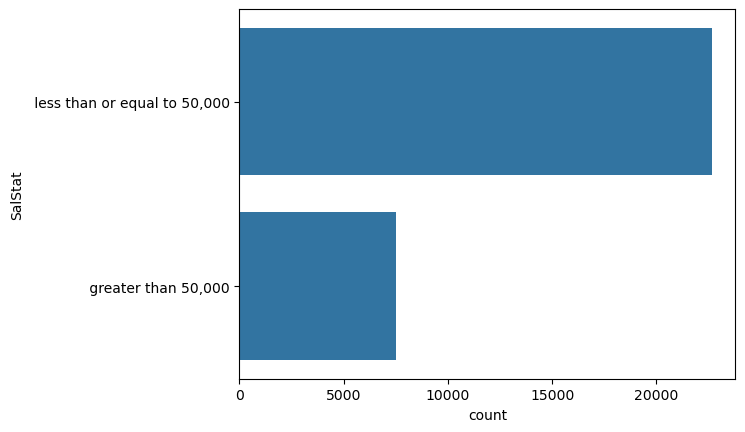

In [20]:
#frequency distribution of salary status
SalStat=sns.countplot(data2['SalStat'])

**HISTOGRAM OF AGE**

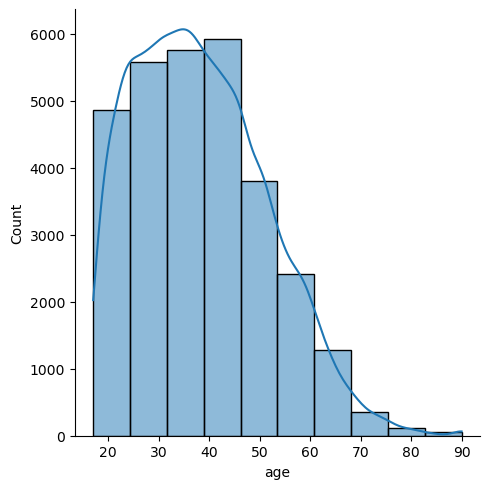

In [21]:
sns.displot(data2['age'],bins=10,kde=True)

**BOX PLOT OF AGE VS SALARY STATUS**

<Axes: xlabel='SalStat', ylabel='age'>

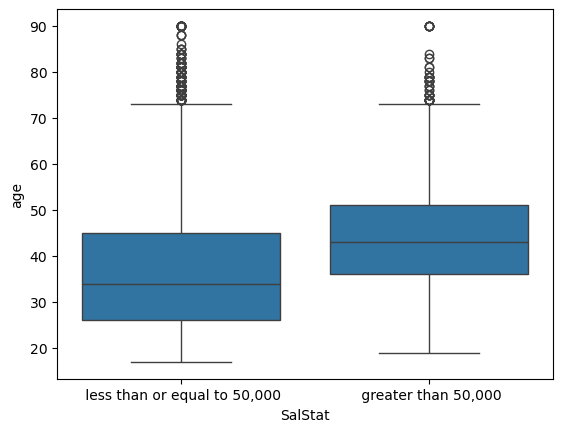

In [22]:
sns.boxplot(x='SalStat',y='age',data=data2)


In [23]:
data2.groupby('SalStat')['age'].median()

SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64

**WE CAN INFER THAT PEOPLE WITH AGE 35-45 ARE MORE LIKELY TO EARN > 50,000**
**WE CAN ALSO INFER THAT PEOPLE WITH AGE 25-35 ARE MORE LIKELY TO EARN <=50,000**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Private'),
  Text(1, 0, ' Federal-gov'),
  Text(2, 0, ' Self-emp-inc'),
  Text(3, 0, ' Self-emp-not-inc'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' State-gov'),
  Text(6, 0, ' Without-pay')])

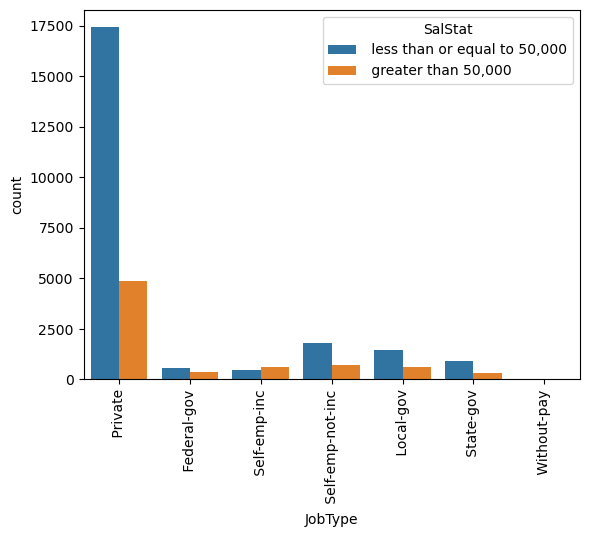

In [24]:
#JobType vs Salary Status
sns.countplot(x='JobType', hue='SalStat', data=data2)
plt.xticks(rotation=90)

In [25]:
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


**From the above table it is visible that 56% of self employed people earn more than 56% of self employed people earn more than 50,000 USD per year, Hence an important variable in avoiding the misuse of studies**

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


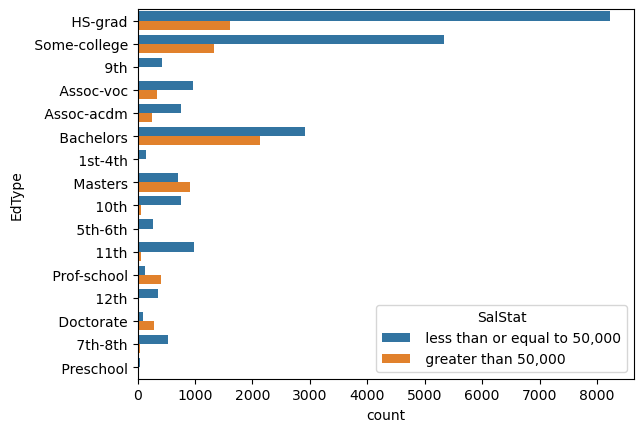

In [26]:
#Education vs salary status
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


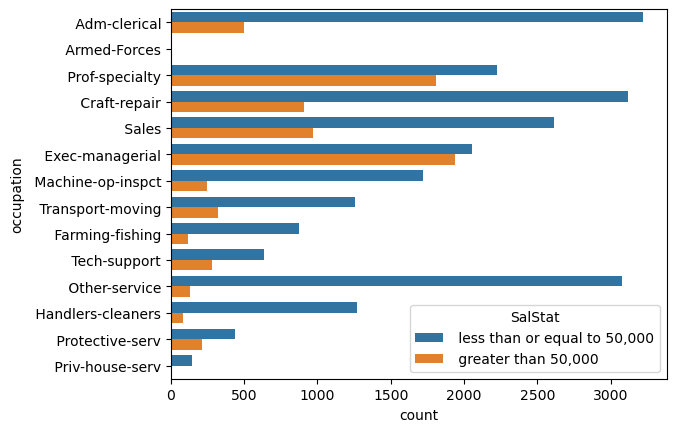

In [27]:
#Occupation vs Salary Status
occupation = sns.countplot(y=data2['occupation'],hue='SalStat',data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

**Those who make more than 50,000 USD per year are more likely to work as managers or professional, hence an important variable in avoiding the misuse of subsidies**

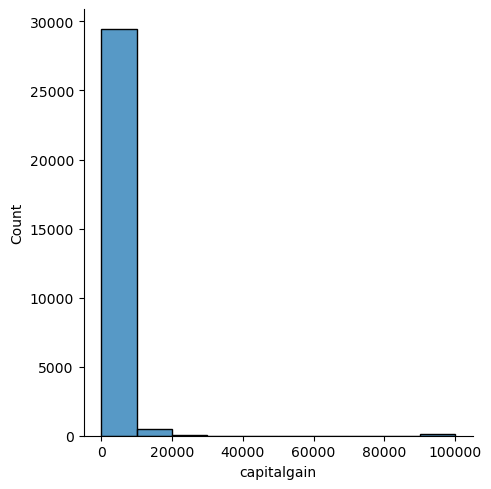

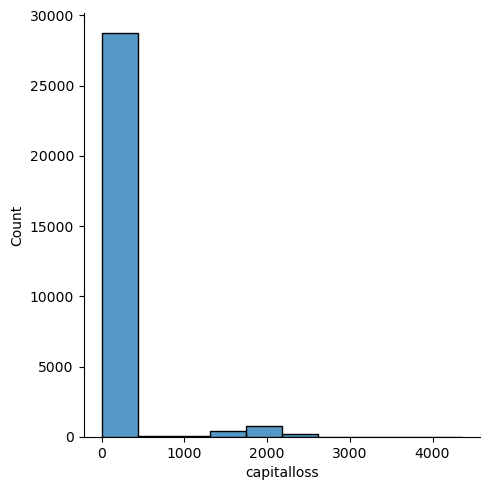

In [28]:
#*** Capital gain
sns.displot(data2['capitalgain'], bins = 10, kde = False)

sns.displot(data2['capitalloss'], bins = 10, kde = False)

<Axes: xlabel='SalStat', ylabel='hoursperweek'>

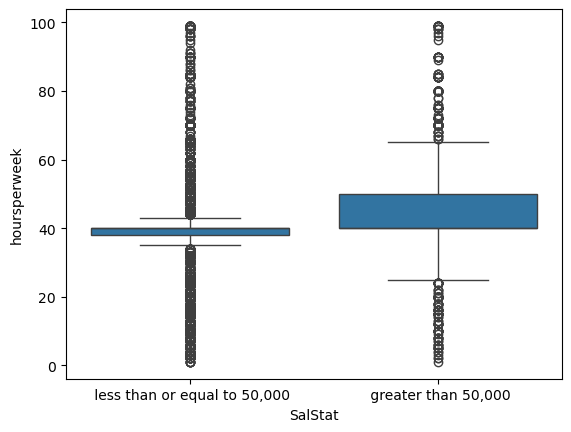

In [29]:
#hours per week vs Salary
sns.boxplot(x='SalStat',y='hoursperweek',data=data2)

**from the plot it is visible that those who spend 40-50 hours per week , earn more than 50,000 USD per year**
**this variable can contribute in classifying status,since there is association between salary status and hours per week**

<h2 style="
    color: #1e3c72;
    background: #e3f2fd;
    padding: 10px 18px;
    border-left: 6px solid #1e3c72;
    border-radius: 8px;
    font-size: 24px;
    font-family:'Inter', Arial, sans-serif;
">
LOGISTIC REGRESSION 
</h2>


In [30]:
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\subha\AppData\Local\Temp\ipykernel_13488\4183655042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [31]:
new_data=pd.get_dummies(data2, drop_first=True)
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)


['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [33]:
# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Ireland', 'JobType_ State-gov', 'capitalloss', 'EdType_ Assoc-acdm', 'maritalstatus_ Never-married', 'race_ Black', 'relationship_ Wife', 'EdType_ HS-grad', 'nativecountry_ Poland', 'EdType_ 11th', 'age', 'nativecountry_ Columbia', 'nativecountry_ Dominican-Republic', 'maritalstatus_ Widowed', 'hoursperweek', 'maritalstatus_ Married-civ-spouse', 'nativecountry_ Germany', 'relationship_ Unmarried', 'race_ Other', 'nativecountry_ Philippines', 'gender_ Male', 'EdType_ Prof-school', 'nativecountry_ Haiti', 'nativecountry_ Hong', 'nativecountry_ Canada', 'nativecountry_ Ecuador', 'occupation_ Exec-managerial', 'EdType_ Bachelors', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ Nicaragua', 'relationship_ Other-relative', 'nativecountry_ Japan', 'occupation_ Sales', 'nativecountry_ Holand-Netherlands', 'occupation_ Priv-house-serv', 'occupation_ Transport-moving', 'occupation_ Handlers-cleaners', 'nativecountry_ Italy', 'nativecountry_ South', 'nativecountry_ Y

In [34]:
#Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [35]:
#Storing the values from input features
x = new_data[features].values
print(x)

[[False False 0 ... True False False]
 [False False 0 ... False False False]
 [False False 0 ... True False False]
 ...
 [False False 0 ... True False False]
 [False False 0 ... False False False]
 [False False 0 ... True False False]]


In [36]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled  = scaler.transform(test_x)



In [38]:
logistic=LogisticRegression(max_iter=1000,solver='lbfgs')

In [39]:
# Fitting the values for x and y
logistic.fit(train_x_scaled,train_y)


LogisticRegression(max_iter=1000)

In [40]:
logistic.coef_

array([[-0.02918393, -0.14598101,  0.26460549,  0.2216538 , -0.24633873,
         0.08757655,  0.27370031,  0.38312334, -0.05484664,  0.0493613 ,
         0.33568065, -0.14543602, -0.11151717,  0.02783273,  0.33323599,
         1.03205559, -0.03323258,  0.11766127,  0.00580039, -0.07445285,
         0.43699179,  0.37046638, -0.04321164, -0.03845186, -0.0474414 ,
        -0.04859293,  0.26726117,  0.73488228, -0.1465869 , -0.05689816,
        -0.05752087, -0.03909585,  0.07229551, -0.03357683, -0.26775545,
        -0.03658594, -0.14857003, -0.01874375, -0.13095145, -0.01807065,
        -0.10071018,  0.53327541, -0.04137926, -0.04677176, -0.12250264,
        -0.18503694,  0.00704695, -0.17947684, -0.27395728, -0.12374503,
        -0.5776479 , -0.05458395, -0.08962096, -0.27508185, -0.05779593,
        -0.02138539,  0.13201619,  0.07710757,  0.3581129 ,  0.07182268,
        -0.05209904,  0.15919973, -0.04295043, -0.04717916, -0.01545371,
        -0.30046077,  0.28204674,  0.06790118, -0.0

In [41]:
logistic.intercept_


array([-1.98380118])

In [42]:
# Prediction from test data
prediction = logistic.predict(test_x_scaled)
print(prediction)


[0 0 0 ... 0 0 0]


In [43]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6316  507]
 [ 917 1309]]


In [44]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)


0.8426345452536191


In [45]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1424


**LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES**

In [46]:
data3 = data_copy.dropna(axis=0)

In [47]:
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\subha\AppData\Local\Temp\ipykernel_13488\2113367113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [48]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

In [49]:
new_data=pd.get_dummies(new_data, drop_first=True)


In [50]:
# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [51]:
# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

['capitalloss', 'EdType_ Assoc-acdm', 'maritalstatus_ Never-married', 'relationship_ Wife', 'EdType_ HS-grad', 'maritalstatus_ Married-AF-spouse', 'EdType_ Doctorate', 'EdType_ 11th', 'age', 'occupation_ Protective-serv', 'maritalstatus_ Widowed', 'hoursperweek', 'occupation_ Armed-Forces', 'maritalstatus_ Married-civ-spouse', 'relationship_ Unmarried', 'EdType_ Assoc-voc', 'EdType_ 12th', 'EdType_ Prof-school', 'relationship_ Not-in-family', 'EdType_ 1st-4th', 'capitalgain', 'occupation_ Prof-specialty', 'EdType_ 7th-8th', 'occupation_ Exec-managerial', 'relationship_ Own-child', 'EdType_ Bachelors', 'maritalstatus_ Married-spouse-absent', 'relationship_ Other-relative', 'EdType_ Some-college', 'occupation_ Sales', 'occupation_ Priv-house-serv', 'occupation_ Transport-moving', 'occupation_ Handlers-cleaners', 'EdType_ 5th-6th', 'EdType_ 9th', 'EdType_ Masters', 'occupation_ Machine-op-inspct', 'maritalstatus_ Separated', 'occupation_ Farming-fishing', 'occupation_ Craft-repair', 'occu

In [52]:
# Storing the output values in y
y2=new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [53]:
# Storing the values from input features
x2 = new_data[features2].values
print(x2)

[[0 False False ... False False False]
 [0 False True ... False False False]
 [0 False False ... False False False]
 ...
 [0 False False ... False False False]
 [0 False False ... False False False]
 [0 False True ... False False False]]


In [54]:
# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [55]:
# Make an instance of the Model
logistic2 = LogisticRegression()

In [56]:
# Fitting the values for x and y
logistic2.fit(train_x2,train_y2)


C:\Users\subha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# Prediction from test data
prediction2 = logistic2.predict(test_x2)


In [58]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())


Misclassified samples: 1494


In [59]:
import joblib
import os

# Create models folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the logistic regression model
joblib.dump(logistic, 'models/logistic_regression_model.pkl')

# Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')

# Save the feature names for later use
joblib.dump(features, 'models/feature_names.pkl')

print("Model, scaler, and feature names saved successfully in the 'models' folder!")

Model, scaler, and feature names saved successfully in the 'models' folder!
